In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
naive = pd.read_csv("top_k_naive_results.csv")
n1 = pd.read_csv("top_k_1_grams_results.csv")
n2 = pd.read_csv("top_k_2_grams_results.csv")
n3 = pd.read_csv("top_k_3_grams_results.csv")
n4 = pd.read_csv("top_k_4_grams_results.csv")
print(len(naive))
print(len(n2))
print(len(n3))
print(len(n4))

100
100
100
100


In [125]:
naive_avgs = naive.mean()
n1_avgs = n1.mean()
n2_avgs = n2.mean()
n3_avgs = n3.mean()
n4_avgs = n4.mean()

In [129]:
naive_data = pd.DataFrame({"type": "naive", "k": [k for k in range(1, len(naive_avgs) + 1)], "top": naive_avgs})
n1_data = pd.DataFrame({"type": "1-gram", "k": [k for k in range(1, len(n1_avgs) + 1)], "top": n1_avgs})
n2_data = pd.DataFrame({"type": "2-grams", "k": [k for k in range(1, len(n2_avgs) + 1)], "top": n2_avgs})
n3_data = pd.DataFrame({"type": "3-grams", "k": [k for k in range(1, len(n3_avgs) + 1)], "top": n3_avgs})
n4_data = pd.DataFrame({"type": "4-grams", "k": [k for k in range(1, len(n4_avgs) + 1)], "top": n4_avgs})

In [130]:
plot_data = pd.concat([naive_data, n1_data, n2_data, n3_data, n4_data])
plot_data

,type,k,top
1,naive,1,342.29
2,naive,2,385.37
3,naive,3,415.71
4,naive,4,442.45
5,naive,5,462.48
...,...,...,...
17,4-grams,17,541.65
18,4-grams,18,553.17
19,4-grams,19,566.30
20,4-grams,20,581.06


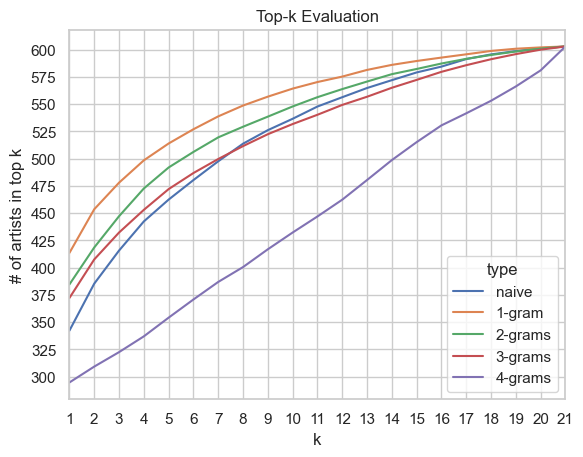

In [131]:
sns.set_theme(style="whitegrid")

ax = sns.lineplot(
    data=plot_data,
    x="k",
    y="top",
    hue="type"
)
ax.set_ylabel("# of artists in top k")

plt.title('Top-k Evaluation')
plt.xticks(np.arange(1, len(naive_data) + 1, 1))
plt.yticks(np.arange(300, naive_avgs.max() + 1, 25))
plt.xlim(1, len(naive_data))

plt.savefig("top-k-evaluation.png")
plt.show()